In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
learning_rate = 0.01
training_epochs = 40

In [2]:
trX = np.linspace(-1,1,101)
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX,i)
    
trY += np.random.randn(*trX.shape) * 1.5

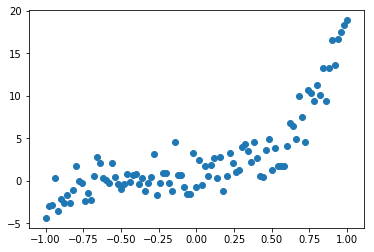

In [4]:
plt.scatter(trX,trY)
plt.show()

In [7]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [5]:
def model(X,w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

In [8]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X,w)

In [9]:
cost = (tf.pow(Y-y_model,2))

In [12]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [15]:
w_val = sess.run(w)
print(w_val)

[0.6787105 1.9267628 4.0843673 4.5246587 3.2927089 4.914956 ]


In [16]:
sess.close()

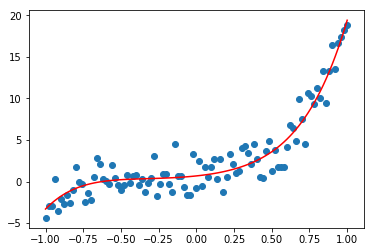

In [17]:
plt.scatter(trX,trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX,i)
plt.plot(trX, trY2,'r')
plt.show()